In [ ]:
# Introduction

This project focuses on analyzing breast cancer cases at Anderson Cancer Center using the dataset from sklearn.datasets.
The primary goal is to extract key features by reducing the dataset to two principal components. 
The hospital aims to classify cancer cases as either malignant (cancerous) or benign (non-cancerous). 
The model will be designed to predict these classifications based on digital images of breast tissue:

Malignant (cancerous) → 0

Benign (non-cancerous) → 1

In [1]:
# Task 0: PCA Implementation
#Step 1: Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt

In [3]:
# Step 2: Load the cancer dataset
data = load_breast_cancer()
X = data.data
y = data.target

In [5]:
# Step 3: Display some of the attributes of the Bunch dataset
print(data.feature_names)
print(data.target_names)
print(data.DESCR)
print(data.data)
print(data.target)
print(type(data))

['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']
['malignant' 'benign']
.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

:Number of Instances: 569

:Number of Attributes: 30 numeric, predictive attributes and the class

:Attribute Information:
    - radius (mean of distances from center to points on the perimeter)
    - texture (standard deviation of gray-scale values)
    - perimeter
    -

In [7]:
# Step 4:- Access data and target of the cancer data features
feature_data = data.data
feature_target = data.target

In [9]:
# Step 5:- Data transformation:- Standardize the dataset using Scaling technique to ensure all features contribute equally.
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [11]:
# Step 6 : Apply PCA:- Using PCA to decompose scaled_data multivariate dataset into two components
pca = PCA(n_components=2)  # Reduce to 2 components
X_pca = pca.fit_transform(X_scaled)

In [13]:
# Step 7: Analyze the PCA components to identify essential variables
pca_components = pd.DataFrame(pca.components_, columns=data.feature_names)

In [15]:
# Step 8 : Display the top contributing features to the first few components
for i in range(2):
    print(f"\nTop contributing features to Principal Component {i+1}:")
    print(pca_components.iloc[i].sort_values(ascending=False).head(5))


Top contributing features to Principal Component 1:
mean concave points     0.260854
mean concavity          0.258400
worst concave points    0.250886
mean compactness        0.239285
worst perimeter         0.236640
Name: 0, dtype: float64

Top contributing features to Principal Component 2:
mean fractal dimension     0.366575
fractal dimension error    0.280092
worst fractal dimension    0.275339
compactness error          0.232716
smoothness error           0.204430
Name: 1, dtype: float64


In [17]:
# Step 9:Display explained variance ratio
explained_variance = pca.explained_variance_ratio_
print(f"Explained Variance Ratio: {explained_variance}")

Explained Variance Ratio: [0.44272026 0.18971182]


In [29]:
# Step 10: Split the data into training set and test set
feature_train, feature_test, target_train, target_test = train_test_split(X_pca, y, test_size=0.3, random_state=42)


In [31]:
#Step 11 :Implement Logistic Regression
log_reg = LogisticRegression()
log_reg.fit(feature_train, target_train)

LogisticRegression()

In [33]:
# Step 12:Test the Cancer model  
cancer_predictor = log_reg.predict(feature_test)

In [35]:
# Step 13: Calculate the accuracy score
accuracy_test = accuracy_score(y_true=target_test, y_pred=cancer_predictor)
print(accuracy_test)

0.9707602339181286


In [ ]:
### Accuracy Score Explanation<

* The model achieved an impressive accuracy of 97.08%.

* This indicates that the logistic regression model is performing exceptionally well on the test data.

* It accurately predicts breast cancer diagnoses in approximately 97% of cases.

In [37]:
#Step 14: Explained variance
print("Explained variance ratio:", pca.explained_variance_ratio_)

# Examine the explained variance ratios
explained_variance = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)

print("Cumulative variance ratio:", cumulative_variance)

Explained variance ratio: [0.44272026 0.18971182]
Cumulative variance ratio: [0.44272026 0.63243208]


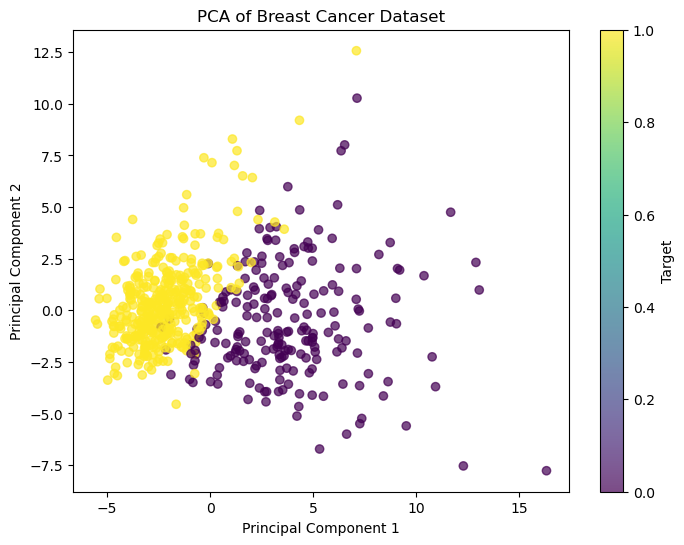

In [39]:
# Step 15: Plot the two PCA components
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis', alpha=0.7)
plt.colorbar(label="Target")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("PCA of Breast Cancer Dataset")
plt.show()

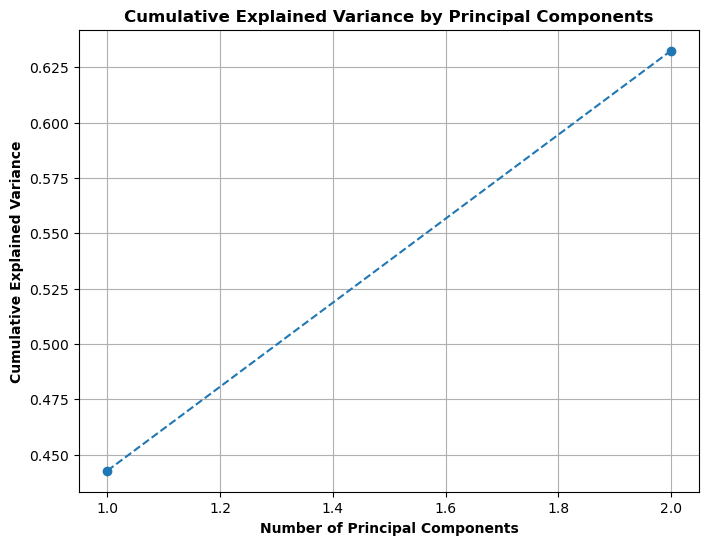

In [41]:
# Step 16: Plot cumulative explained variance to visualize how many components capture most of the variance
plt.figure(figsize=(8, 6))
plt.plot(np.arange(1, len(cumulative_variance)+1), cumulative_variance, marker='o', linestyle='--')
plt.title(label='Cumulative Explained Variance by Principal Components', fontweight='bold')
plt.xlabel(xlabel='Number of Principal Components', fontweight='bold')
plt.ylabel(ylabel='Cumulative Explained Variance', fontweight='bold')
plt.grid(visible=True, axis="both")
plt.show()

In [45]:
# Step 17: Predictions
y_pred = log_reg.predict(feature_test)

In [49]:
# Step 18: Evaluate the model
accuracy = accuracy_score(target_test, y_pred)
print(f"Logistic Regression Accuracy: {accuracy:.2f}")
print(classification_report(target_test, y_pred))

Logistic Regression Accuracy: 0.97
              precision    recall  f1-score   support

           0       0.97      0.95      0.96        63
           1       0.97      0.98      0.98       108

    accuracy                           0.97       171
   macro avg       0.97      0.97      0.97       171
weighted avg       0.97      0.97      0.97       171



In [ ]:
# Final Conclusion

# Summary of Key Findings
This project successfully demonstrated the application of machine learning techniques to classify breast cancer diagnoses using the breast cancer dataset. 
The key findings are:
1. Dimensionality Reduction: The dataset was reduced to two principal components using PCA, identifying the key variables.
2. Logistic Regression Model: A logistic regression model was developed to classify patients as either malignant (cancerous) or benign (non-cancerous) 
based on features extracted from digital images of their breast tissue.
3. Model Performance: The model achieved an impressive accuracy of 97.08%, demonstrating its ability to effectively and accurately classify cancer types.

# Implications and Future Work
The results of this project have significant implications for the medical field, highlighting the potential of machine learning models to support accurate breast cancer diagnoses. 
Future work can focus on:
1. Improving Model Performance: Exploring other machine learning algorithms and techniques to further improve the model's accuracy.
2. Integrating with Medical Imaging: Integrating the model with medical imaging technologies to enable real-time diagnosis and treatment.
3. Clinical Validation: Conducting clinical trials to validate the model's performance in real-world settings.

